In [161]:
import numpy as np
import pandas as pd

In [151]:
sr = 10   # down sampling rate from MIDI to time axis

In [182]:
path="outputs/"
#target="bac-inv001-o-p1.csv"
target="bac-wtc101-p-a-p1.csv"
df=pd.read_csv(path+target)
display(df[73:90])

,type,time,control,value,channel,time_counter,note,velocity,note_name
73,note_on,383,NaN,NaN,0,49825,60.0,38.0,C
74,control_change,19,64.0,75.0,0,49844,NaN,NaN,NaN
75,control_change,365,64.0,71.0,0,50209,NaN,NaN,NaN
76,control_change,384,64.0,71.0,0,50593,NaN,NaN,NaN
77,control_change,384,64.0,73.0,0,50977,NaN,NaN,NaN
78,control_change,384,64.0,75.0,0,51361,NaN,NaN,NaN
79,control_change,384,64.0,79.0,0,51745,NaN,NaN,NaN
80,control_change,383,64.0,83.0,0,52128,NaN,NaN,NaN
81,control_change,385,64.0,87.0,0,52513,NaN,NaN,NaN
82,control_change,384,64.0,91.0,0,52897,NaN,NaN,NaN


In [183]:
note_on=df[df['type']=='note_on'][['time_counter','note_name','velocity']]
#note_on=note_on.reindex(index=range(len(note_on)))
display(note_on[:30])

,time_counter,note_name,velocity
73,49825,C,38.0
93,57007,E,17.0
104,61710,G,28.0
108,65704,C,38.0
110,68968,E,37.0
116,73018,G,25.0
119,77128,C,41.0
121,80295,E,36.0
128,84059,C,34.0
140,87900,E,33.0


In [184]:
tmp_duration=pd.DataFrame(note_on.time_counter.diff().shift(-1))
tmp_duration=tmp_duration.rename(columns={"time_counter":"duration"})
df_duration=pd.concat([note_on,tmp_duration], axis=1)
df_duration.index=range(len(df_duration))
df_duration[:5]

,time_counter,note_name,velocity,duration
0,49825,C,38.0,7182.0
1,57007,E,17.0,4703.0
2,61710,G,28.0,3994.0
3,65704,C,38.0,3264.0
4,68968,E,37.0,4050.0


In [185]:
display(df_duration[["duration","velocity"]].describe())
print(df_duration[["duration","velocity"]].mean())
df_duration["Dduration"]=df_duration["duration"]-df_duration["duration"].mean()
df_duration["Dvelocity"]=df_duration["velocity"]-df_duration["velocity"].mean()

df_duration[:10]


,duration,velocity
count,551.000000,552.000000
mean,3859.446461,41.847826
std,845.943456,9.046083
min,20.000000,0.000000
25%,3532.000000,36.000000
50%,3821.000000,41.500000
75%,4089.000000,48.000000
max,15379.000000,70.000000


duration    3859.446461
velocity      41.847826
dtype: float64


,time_counter,note_name,velocity,duration,Dduration,Dvelocity
0,49825,C,38.0,7182.0,3322.553539,-3.847826
1,57007,E,17.0,4703.0,843.553539,-24.847826
2,61710,G,28.0,3994.0,134.553539,-13.847826
3,65704,C,38.0,3264.0,-595.446461,-3.847826
4,68968,E,37.0,4050.0,190.553539,-4.847826
5,73018,G,25.0,4110.0,250.553539,-16.847826
6,77128,C,41.0,3167.0,-692.446461,-0.847826
7,80295,E,36.0,3764.0,-95.446461,-5.847826
8,84059,C,34.0,3841.0,-18.446461,-7.847826
9,87900,E,33.0,3723.0,-136.446461,-8.847826


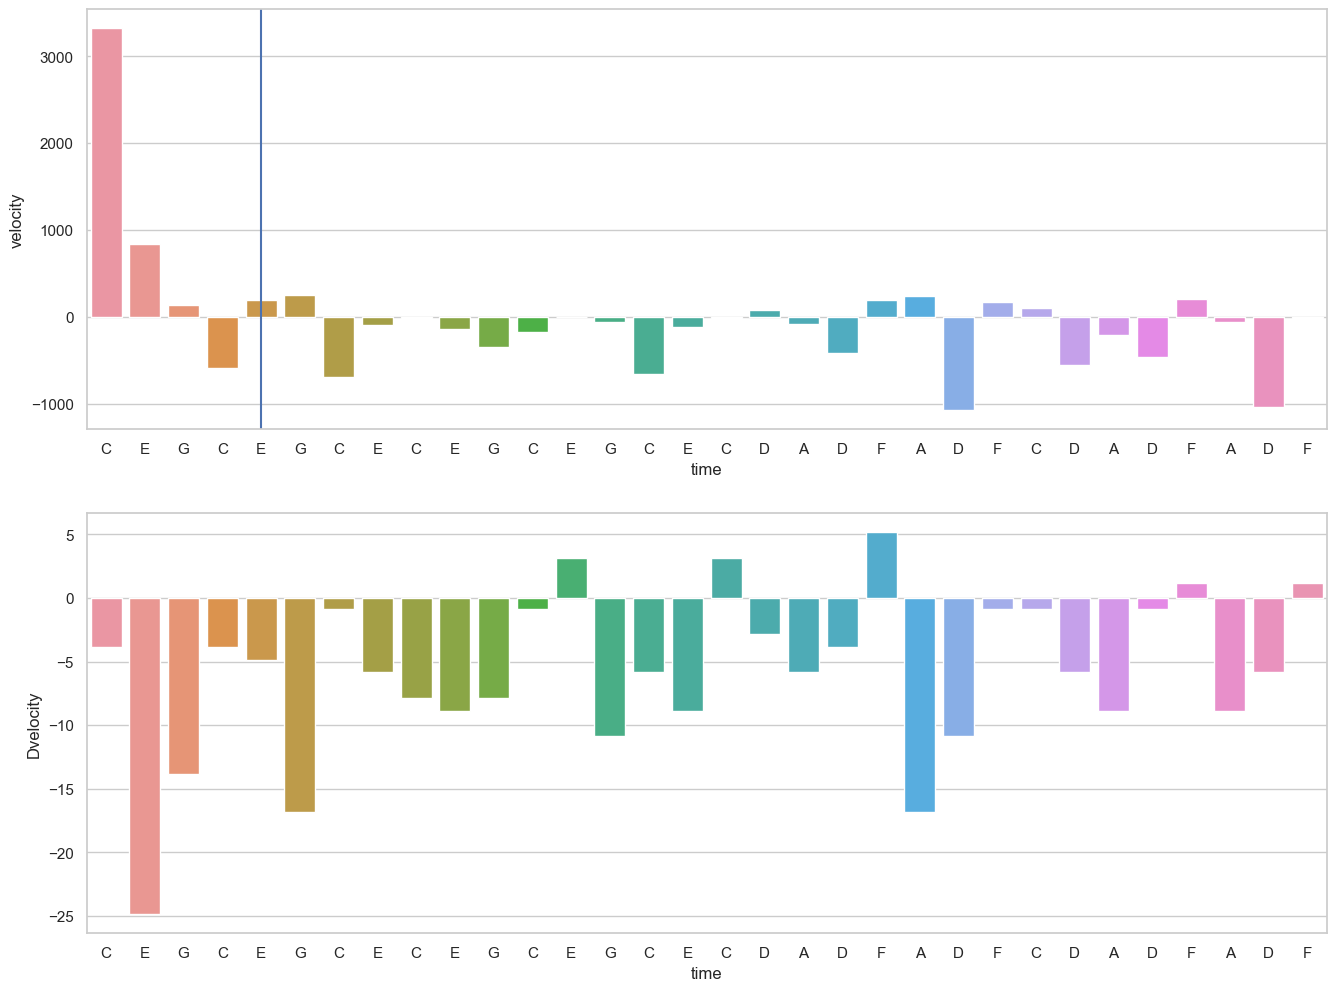

In [211]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style(style="whitegrid")
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(16,12))
target=df_duration[:32]


# g1=ax[0].bar(range(len(target["Dduration"])),target["Dduration"])
# g2=ax[1].bar(range(len(target["Dduration"])),target["Dvelocity"])

g1=sns.barplot(data=target, x="time_counter",y="Dduration", ax=ax[0])
g2=sns.barplot(data=df_duration[:32], x="time_counter",y="Dvelocity", ax=ax[1])

notes=list(target.note_name)
g1.set_xlabel("time")
g1.set_ylabel("duration")
g2.set_xlabel("time")
g1.set_ylabel("velocity")

g1.set_xticks(range(len(notes)))
g2.set_xticks(range(len(notes)))
p=g1.set_xticklabels(notes)
p=g2.set_xticklabels(notes)

ax[0].axvline(x=4)